<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SVM : Support Vector Machine
#    - 가장 인공지능스러운 기법
#    - 현재는 입지가 좀 애매, 딥러닝이 휩쓸고 다녀서
#    - 그러나 직관적이고 계산이 빠른 측면이 존재
#    - ex) 앱에서 간단하게 돌아가는 것? SVM이 유리

# SVM - SVC : Support Vector Classifier
#     - SVR : Support Vector Regressor
#        - 거의 SVC를 쓴다, SVC가 정확도도 더 좋은듯?

# 가장 근접한 두 점 사이에 마진(여유분)이 가장 큰 벡터 = 서포트 벡터

# 얼마나 버릴 것이냐? Cost : 값
# - 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지 결정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

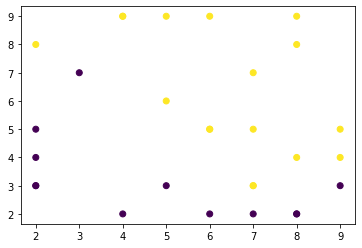

In [ ]:
df = pd.read_csv("/content/work.csv")

ap = np.array(df['app'])
pe = np.array(df['per'])
target = np.array(df['fav'])


plt.scatter(ap, pe, c=target);

In [ ]:
data = np.column_stack((ap, pe))
data

array([[8, 9],
       [7, 5],
       [2, 3],
       [4, 2],
       [5, 9],
       [9, 3],
       [7, 3],
       [6, 5],
       [7, 2],
       [5, 6],
       [4, 9],
       [9, 5],
       [5, 3],
       [2, 3],
       [7, 3],
       [8, 2],
       [2, 8],
       [3, 7],
       [2, 5],
       [7, 7],
       [6, 9],
       [9, 4],
       [8, 2],
       [6, 5],
       [8, 8],
       [2, 4],
       [8, 4],
       [6, 2],
       [4, 9]])

In [ ]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [ ]:
from sklearn.svm import SVC

# kernel = 어떤 커널을 통해서 값을 도출할 것이냐? 
#          linear(선형)? polynomial(다항,곡선)? RBF(기본값, radius bias function, 가우시안 커널)?
#          RBF - 함수의 형태가 아니라 확률의 형태로 만든다, 조금 더 높은 확률을 고른다.
#                많이 겹쳐있는 애매한 곳은 나누기가 어려워서 확률적으로 고름
#              - gamma 매개변수 : 하나의 데이터 샘플이 영향력을 행사하는 거리
#                               : 감마가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지고
#                                 감마가 낮을수록 커진다

# C = 커질수록 실수를 용납하지 않는다. 과적합 가능성이 높아진다. 0.01, 0.05 등 다양

model = SVC(kernel='linear', C=0.1)     # 장점 - 수치가 나온다
model.fit(input_train, output_train)

model2 = SVC(kernel='poly', C=0.1)
model2.fit(input_train, output_train)

model3 = SVC(kernel='rbf', C=0.1)
model3.fit(input_train, output_train)

print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))
print()

print("Poly 학습 점수 : {}".format(model2.score(input_train, output_train)))
print("Poly 평가 점수 : {}".format(model2.score(input_test, output_test)))
print()

print("RBF 학습 점수 : {}".format(model3.score(input_train, output_train)))
print("RBF 평가 점수 : {}".format(model3.score(input_test, output_test)))

Linear 학습 점수 : 0.8571428571428571
Linear 평가 점수 : 0.875

Poly 학습 점수 : 0.8571428571428571
Poly 평가 점수 : 0.875

RBF 학습 점수 : 0.6190476190476191
RBF 평가 점수 : 0.5


In [ ]:
# 선형 svc의 상관계수
coef = model.coef_
coef
# [a1, a2]

array([[0.30882353, 0.51470588]])

In [ ]:
intercept = model.intercept_
intercept

array([-3.73529412])

In [ ]:
a1 = coef[0][0]
a2 = coef[0][1]

In [ ]:
# y = ax + b
a = -(a1/a2)
b = -(intercept[0]/a2)

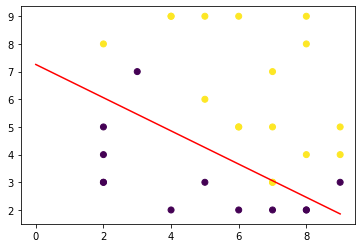

In [ ]:
x = np.arange(0, 10)
plt.scatter(ap, pe, c=target)
plt.plot(x, a*x + b, 'r');

In [ ]:
# 릿지 : 변수가 중요, 가중치의 제곱들을 더하는 방식이라 급변한다.
# 랏쏘 : 변수보단 조합이 중요하다. 가중치의 절대값들을 더한다

data = pd.read_csv("https://bit.ly/perch_csv")
data.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
data = np.array(data)
target = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

(56, 56)

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(input_train, output_train)

LinearRegression()

In [ ]:
print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))

Linear 학습 점수 : 0.951804711093903
Linear 평가 점수 : 0.9118165004899212


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

model = PolynomialFeatures(degree=1)
train_poly = model.fit_transform(input_train)
test_poly = model.fit_transform(input_test)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(train_poly, output_train)

Ridge(alpha=0.1)

In [ ]:
model.score(test_poly, output_test)

0.9116868896642765

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(train_poly, output_train)

Lasso(alpha=0.1)

In [ ]:
model.score(test_poly, output_test)

0.9116868896642765

**2022 - 2 - 17**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target 
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
Tax = np.array(df['TAX']).reshape(-1,1)
Target = np.array(df['TARGET']).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(Tax, Target, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_input, train_output)

LinearRegression()

In [ ]:
model.coef_, model.intercept_
# y = ax + b
# a = -0.02457067, b = 32.64263171

(array([[-0.02457067]]), array([32.64263171]))

In [ ]:
model.predict([[300]])

array([[25.27142998]])

In [ ]:
model.score(test_input, test_output)

0.2592978838222414

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# RM, B, LSTAT, CHAS, TAX
TAX = np.array(df['TAX']).reshape(-1,1)
B = np.array(df['B']).reshape(-1,1)
RM = np.array(df['RM']).reshape(-1,1)
CHAS = np.array(df['CHAS']).reshape(-1,1)
LSTAT = np.array(df['LSTAT']).reshape(-1,1)

In [ ]:
data = np.column_stack((RM, B, LSTAT, CHAS, TAX))

In [ ]:
train_input, test_input, train_output, test_output = train_test_split(data, Target, test_size=0.3)

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(train_input, train_output)

Ridge()

In [ ]:
model_ridge.score(test_input, test_output)

0.6972546723057615

In [ ]:
# alpha 값 : 규제를 얼마나 할 것이냐
model_ridge2 = Ridge(alpha=0.5)
model_ridge2.fit(train_input, train_output)

Ridge(alpha=0.5)

In [ ]:
model_ridge2.score(test_input, test_output)

0.6979484334079419

In [ ]:
model_ridge3 = Ridge(alpha=3)
model_ridge3.fit(train_input, train_output)

Ridge(alpha=3)

In [ ]:
model_ridge3.score(test_input, test_output)

0.6945830106179534

In [ ]:
from sklearn.linear_model import Lasso 
model_lasso = Lasso(alpha=0.2)
model_lasso.fit(train_input, train_output)

Lasso(alpha=0.2)

In [ ]:
model_lasso.score(test_input, test_output)

0.6649130627868867

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
ls2 = Lasso(alpha=0.5)
ls2.fit(test_scaled, test_output)

Lasso(alpha=0.5)

In [ ]:
ls2.score(test_scaled, test_output)

0.7491686476022238

In [ ]:
import cv2

In [ ]:
# 이미지 가져오기, 흑백화
for i in [1,2,3]:
  globals()['image{}'.format(i)] = cv2.imread('/content/000{0}.jpg'.format(i), cv2.IMREAD_GRAYSCALE)
plt.imshow(image1)

In [ ]:
# 이미지 리사이징
for i in [1,2,3]:
  globals()['image{}_resized'.format(i)] = cv2.resize(locals()['/content/000{0}.jpg'.format(i)], (100,100)).astype(np.int16)
plt.imshow(image1_resized)

In [ ]:
# 행렬로 나뉜 이미지를 1차원으로 줄이기
for i in [1,2,3]:
  globals()['image{}_resized_reshaped'.format(i)] = locals()['image{}_resized_scaled'.format(i)].reshape(-1,100*100)

In [ ]:
target1 = np.array([0])
target2 = np.array([1])
target3 = np.array([2])

In [ ]:
for i in [1,2,3]:
  globals()['image{}_resized_reshaped'.format(i)] = np.append(locals()['image{}_resized_reshaped'.format(i)], locals()['target{}'].format(i))

In [ ]:
data = np.ones(10001)
for i in [1,2,3]:
  data = np.vstck((data, locals()['image{}_resized_reshaped'.format(i)]))
data = data[1:]

In [ ]:
data_saved = pd.DataFrame(data, columns = np.arange(0, 10001))
data_saved.to_csv('data.csv')

In [ ]:
input = data_saved[np.arange(0, 10000)]
target = data_saved[10000]

In [ ]:
train_input, test_input, train_output, test_output = train_test_split(input, target, test_size=0.3)

**2022 - 2 - 22**

In [ ]:
# 인공신경망 - 퍼셉트론
# 딥러닝과 인공신경망은 비슷한 것이다. (인공신경망은 머신러닝의 일종)
# 인공신경망 - Artificial Neural Network (ANN)
#     - 인간의 신경망을 모방
#     - 정확도를 높이려면 데이터 수가 많아야 한다
#     - 구글 -< 알파고
# tensorflow (keras)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, -1]

In [ ]:
Perc = Perceptron()
Perc.fit(x, y)
Perc.score(x,y)

0.5

In [ ]:
Perc.coef_

array([[0., 0.]])

In [ ]:
Perc.intercept_

array([0.])

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
digit = datasets.load_digits()

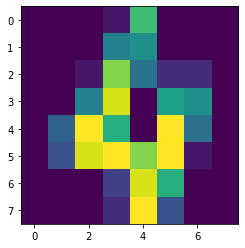

In [ ]:
plt.imshow(digit.images[4]);

In [ ]:
digit.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

In [ ]:
input = digit.data
output = digit.target

In [ ]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
Perc.fit(train_input, train_output)

Perceptron()

In [ ]:
Perc.score(test_input, test_output)

0.9044444444444445

**2022 - 2 - 24**

In [ ]:
# 원하는 데이터가 없다면?
# - 필요한 데이터 : A, B, C - 0, 1
# - 없는 데이터   : A
# - 혹시 D가 A를 대체할 수 있는가? 그렇다면 D와 A의 관계성을 논리적으로 설명할 수 있어야 한다.
# (가정을 해야한다. hypothesis)

In [ ]:
# 인공신경망에서 Z의 값은
# -무한 < Z < 무한    -> 활성함수(sigmoid, relu)를 통해서
#   0  < x <  1 (sigmoid)
#   적당한 범위 (relu) 로 만들어준다
# 그리고 이런 활성함수가 다양하다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

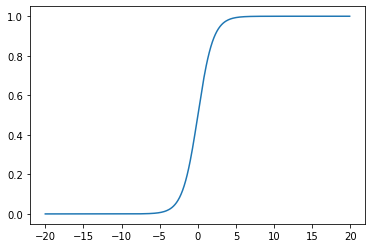

In [ ]:
z = np.arange(-20, 20, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi);

In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
cancer_scaled = SS.fit_transform(cancer.data)
cancer_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
input = cancer_scaled
output = cancer.target

In [ ]:
output, input

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3)

In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
Perc = Perceptron()
Logi = LogisticRegression()

In [ ]:
Perc.fit(X_train, y_train)
Logi.fit(X_train, y_train)

LogisticRegression()

In [ ]:
Perc.score(X_test, y_test)

0.9707602339181286

In [ ]:
Logi.score(X_test, y_test)

0.9941520467836257

In [ ]:
Logi.coef_, Logi.intercept_

(array([[-0.30579894, -0.473845  , -0.29275573, -0.35321274, -0.09198907,
          0.54234396, -0.75056824, -0.97474157,  0.08205696,  0.01624638,
         -1.2244384 ,  0.34587873, -0.67014519, -0.91068945, -0.31928877,
          1.07833889,  0.0626196 , -0.41424462,  0.39963297,  0.52392948,
         -0.99192048, -1.11940715, -0.75556918, -0.90109267, -0.34931084,
          0.08268817, -0.6334671 , -0.91937495, -0.92772677, -0.41245864]]),
 array([0.15231936]))

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, Perc.predict(X_test))
CM

array([[74,  1],
       [ 4, 92]])

In [ ]:
CM2 = confusion_matrix(y_test, Logi.predict(X_test))
CM2

array([[74,  1],
       [ 0, 96]])

In [ ]:
acc = (CM2[0][0] + CM2[1][1]) / (CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])
acc

0.9941520467836257

In [ ]:
sense = CM2[0][0] / (CM2[0][0] + CM2[1][0])
sense

1.0

In [ ]:
Specificity = CM2[1][1] / (CM2[0][1]+CM2[1][1])
Specificity

0.9896907216494846

In [ ]:
Precision = CM2[0][0] / (CM2[0][0] + CM2[0][1])
Precision

0.9866666666666667

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracy_score(y_test, Logi.predict(X_test))

0.9941520467836257

In [ ]:
recall_score(y_test, Logi.predict(X_test))

1.0

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
Logi_prob = Logi.predict_proba(X_test)
Logi_prob = Logi_prob[:,1]
FPR, TPR, threshold = roc_curve(y_test, Logi_prob)
roc_auc_score(y_test, Logi.predict_proba(X_test)[:,1])

0.9990277777777778

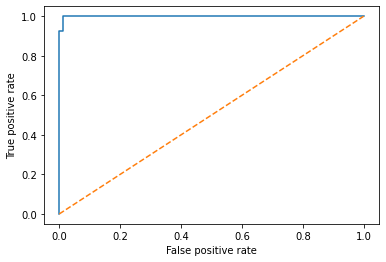

In [ ]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');

**2022 - 2 - 25**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.preprocessing import StandardScaler 
SS = StandardScaler()
cancer_scaled = SS.fit_transform(cancer.data)

In [ ]:
X = cancer_scaled
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.9532163742690059

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.9824561403508771

In [ ]:
score_list = []
for i in range(1, 101):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  LR = LogisticRegression()
  LR.fit(X_train, y_train)
  score = LR.score(X_test, y_test)
  score_list.append(score)

score_list

[0.9707602339181286,
 0.9707602339181286,
 0.9766081871345029,
 0.9649122807017544,
 0.9824561403508771,
 0.9883040935672515,
 0.9707602339181286,
 0.9766081871345029,
 0.9883040935672515,
 0.9649122807017544,
 0.9532163742690059,
 0.9824561403508771,
 0.9883040935672515,
 0.9824561403508771,
 0.9590643274853801,
 0.9590643274853801,
 0.9766081871345029,
 0.9941520467836257,
 0.9590643274853801,
 0.9824561403508771,
 0.9766081871345029,
 0.9590643274853801,
 0.9766081871345029,
 0.9649122807017544,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9707602339181286,
 0.9941520467836257,
 0.9883040935672515,
 0.9707602339181286,
 0.9590643274853801,
 0.9707602339181286,
 1.0,
 0.9707602339181286,
 0.9824561403508771,
 0.9824561403508771,
 0.9649122807017544,
 0.9590643274853801,
 0.9766081871345029,
 0.9941520467836257,
 0.9824561403508771,
 0.9649122807017544,
 0.9766081871345029,
 0.9883040935672515,
 0.9766081871345029,
 0.9883040935672515,
 0.9824561403508771,
 0.9415

In [ ]:
mean = np.mean(score_list)
mean

0.9749122807017543

In [ ]:
std = np.std(score_list)
std

0.012468489060513272

In [ ]:
n = len(score_list)
n

100

In [ ]:
# Confidence Interval 신뢰 구간
min_CI = mean - std / np.sqrt(n) * 1.96
max_CI = mean + std / np.sqrt(n) * 1.96
min_CI, max_CI

(0.9724684568458937, 0.9773561045576149)

In [ ]:
max_CI - mean, mean

(0.0024438238558606162, 0.9749122807017543)

In [ ]:
from keras.models import Sequential # 딥러닝 함수 호출
from keras.layers import Dense      # 가져다 붙이기 위해서

In [ ]:
DNN = Sequential()
DNN.compile(loss="mean_squared_error", metrics='accuracy')

In [ ]:
DNN.fit(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 2.0391 - accuracy: 0.0653


In [ ]:
DNN.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 2.1624 - accuracy: 0.0643


[2.1623830795288086, 0.06432748585939407]

In [ ]:
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN2 = Sequential()
DNN2.add(Dense(18, activation='relu')) # Dense(layer안에서 Z의 개수, 활성함수)
DNN2.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
DNN2.fit(X_train, y_train)

13/13 [==============================] - 1s 4ms/step - loss: 0.8060 - accuracy: 0.2286


In [ ]:
DNN2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.8413 - accuracy: 0.2281


[0.8412850499153137, 0.22807016968727112]

In [ ]:
DNN2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                558       
                                                                 
Total params: 558
Trainable params: 558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN3 = Sequential()
DNN3.add(Dense(15, activation='relu'))
DNN3.add(Dense(1, activation='sigmoid')) # add - 층 생성
DNN3.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
DNN3.fit(X_train, y_train)

13/13 [==============================] - 1s 4ms/step - loss: 0.2364 - accuracy: 0.6281


In [ ]:
DNN3.fit(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.8012


In [ ]:
DNN3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN4 = Sequential()
DNN4.add(Dense(18, activation='relu'))
DNN4.add(Dense(9, activation='relu'))
DNN4.add(Dense(1, activation='sigmoid'))
DNN4.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
DNN4.fit(X_train, y_train)

13/13 [==============================] - 2s 4ms/step - loss: 0.2949 - accuracy: 0.3844


In [ ]:
DNN4.evaluate(X_test, y_test) # 트레인보다 테스트 정확도가 낮으면 과적합

6/6 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.4620


[0.26356184482574463, 0.46198830008506775]

In [ ]:
DNN4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 18)                558       
                                                                 
 dense_8 (Dense)             (None, 9)                 171       
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN5 = Sequential()
DNN5.add(Dense(8, activation='relu'))
DNN5.add(Dense(1, activation='sigmoid'))
DNN5.compile(loss='mean_squared_error', metrics='accuracy', optimizer='sgd')

In [ ]:
DNN5.fit(X_train, y_train)

13/13 [==============================] - 1s 5ms/step - loss: 0.3485 - accuracy: 0.4095


In [ ]:
DNN5.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.4620


[0.26356184482574463, 0.46198830008506775]

In [ ]:
DNN5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 248       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN6 = Sequential()
DNN6.add(Dense(10, activation='relu'))
DNN6.add(Dense(5, activation='sigmoid'))
DNN6.add(Dense(1, activation='sigmoid'))
DNN6.compile(loss='mean_squared_error', metrics='accuracy', optimizer='sgd')

In [ ]:
DNN6.fit(X_train, y_train)

13/13 [==============================] - 1s 5ms/step - loss: 0.2200 - accuracy: 0.7940


In [ ]:
DNN6.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.8187


[0.21611624956130981, 0.8187134265899658]

In [ ]:
DNN6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                310       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DNN7 = Sequential()
DNN7.add(Dense(10, activation='relu'))
DNN7.add(Dense(5, activation='sigmoid'))
DNN7.add(Dense(1, activation='sigmoid'))
DNN7.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
DNN7.fit(X_train, y_train)

13/13 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.6407


In [ ]:
DNN7.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.5965


[0.24782027304172516, 0.5964912176132202]

In [ ]:
DNN7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                310       
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


**2022 - 3 - 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cancer_s = ss.fit_transform(cancer.data)

In [ ]:
X = cancer_s
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dnn = Sequential()
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
dnn.fit(X_train, y_train)

15/15 [==============================] - 2s 2ms/step - loss: 0.1570 - accuracy: 0.8132


In [ ]:
dnn.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9825


[0.06623702496290207, 0.9824561476707458]

In [ ]:
# epoch - 어떤 양의 데이터 덩어리를 한 번 보는 것이 1 epoch
#         ------ 의 데이터를 두 번 보면 2 epoch
#         --- --- 2개의 데이터 뭉치를 2번씩 보면 각각 2 epoch 그리고 총 4번의 반복

# epoch를 많이 돌릴 수록 과적합의 위험이 존재

# 성능은 높이고 과적합은 다운?
#       - batch
#             데이터 한 뭉치를 1 batch
#                    그 데이터를 2개로 나누면 2 batch가 된다
#       - mini batch - 정확도를 어느정도 올려준다
# 500개의 데이터에서 batch 사이즈는 100개면, 기존 데이터 500개에서 100개를 random하게 뽑는다. -> 과적합에 강하다

In [ ]:
dnn2 = Sequential()
dnn2.add(Dense(100, activation='relu'))
dnn2.add(Dense(1, activation='sigmoid'))
dnn2.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
dnn2.fit(X_train, y_train, epochs=10)

Epoch 1/10
15/15 [==============================] - 2s 4ms/step - loss: 0.1215 - accuracy: 0.9055
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9626
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 0.9736
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9736
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9780
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9758
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9802
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9824
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9824
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9868


In [ ]:
dnn2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9825


[0.011937921866774559, 0.9824561476707458]

In [ ]:
dnn3 = Sequential()
dnn3.add(Dense(100, activation='relu'))
dnn3.add(Dense(1, activation='sigmoid'))
dnn3.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
dnn3.fit(X_train, y_train, epochs=10, batch_size=50) # epoch 10 batch 50 총 데이터수 500 - iteration - 100번

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.1764 - accuracy: 0.7670
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9187
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9429
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9692
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9736
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9736
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9758
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9736
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9780
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9824


In [ ]:
dnn3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.9912


[0.013448596000671387, 0.9912280440330505]

In [ ]:
# DropOut - 일정 부분을 생략, 보통 0.2를 쓴다
#         - 하지만 layers 숫자가 많을 때 써야 한다.

In [ ]:
from keras.layers import Dropout
dnn4 = Sequential()
dnn4.add(Dense(100, activation='relu'))
dnn4.add(Dropout(0.1))
dnn4.add(Dense(1, activation='sigmoid'))
dnn4.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
dnn4.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.1404 - accuracy: 0.8418
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9319
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9516
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9626
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9626
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9736
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9692
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9780
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9758
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9802


In [ ]:
dnn4.evaluate(X_test, y_test)

4/4 [==============================] - 1s 4ms/step - loss: 0.0110 - accuracy: 0.9912


[0.011034845374524593, 0.9912280440330505]

In [ ]:
dnn5 = Sequential()
dnn5.add(Dense(200, activation='relu'))
dnn5.add(Dropout(0.15))
dnn5.add(Dense(100, activation='relu'))
dnn5.add(Dense(1, activation='sigmoid'))
dnn5.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
dnn5.fit(X_train, y_train, epochs=20, batch_size=40)

Epoch 1/20
12/12 [==============================] - 2s 7ms/step - loss: 0.0932 - accuracy: 0.8879
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9626
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.9824
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9802
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9868
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9846
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9890
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9868
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9912
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 0.9912
Epoch 11/20
12/12 [

In [ ]:
dnn5.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.9825


[0.005319830030202866, 0.9824561476707458]

In [ ]:
# 손실함수 - 측정한 데이터를 토대로 산출한 모델의 예측값과 실젝밧의 차이를 표현하는 지표
# 엔트로피 - 무질서도

In [ ]:
dnn6 = Sequential()
dnn6.add(Dense(100, activation='relu'))
dnn6.add(Dropout(0.15))
dnn6.add(Dense(1, activation='sigmoid'))
dnn6.compile(loss='binary_crossentropy', metrics='accuracy')

In [ ]:
dnn6.fit(X_train, y_train, epochs=20, batch_size=40)

Epoch 1/20
12/12 [==============================] - 2s 3ms/step - loss: 0.4996 - accuracy: 0.8000
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.2793 - accuracy: 0.9363
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9582
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.1605 - accuracy: 0.9582
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.1393 - accuracy: 0.9648
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9736
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1003 - accuracy: 0.9824
Epoch 8/20
12/12 [==============================] - 0s 7ms/step - loss: 0.0929 - accuracy: 0.9846
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9802
Epoch 10/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0792 - accuracy: 0.9824
Epoch 11/20
12/12 [

In [ ]:
dnn6.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9912


[0.03583141043782234, 0.9912280440330505]

**2022 - 3 - 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cancer_s = ss.fit_transform(cancer.data)

In [ ]:
X = cancer_s
y = cancer.target

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
dnn = Sequential()
dnn.add(Dense(100, activation='relu')) # 은닉,밀집층
dnn.add(Dense(150, activation='relu')) # 은닉,밀집층
dnn.add(Dense(1, activation='sigmoid')) # 출력층
dnn.compile(loss='mean_squared_error', metrics='accuracy')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
dnn.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.9978
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 8.0391e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 8ms/step - loss: 5.7282e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 5.9288e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 7ms/step - loss: 4.7698e-04 - accuracy: 1.0000


In [ ]:
dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 150)               15150     
                                                                 
 dense_8 (Dense)             (None, 1)                 151       
                                                                 
Total params: 18,401
Trainable params: 18,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# validation
# - train - 80%, test - 20%
# - validation - 10% of train data

X_train_re, X_test_val, y_train_re, y_test_val = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
dnn.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.0408 - accuracy: 0.9649


[0.04082346707582474, 0.9649122953414917]

In [ ]:
dnn.evaluate(X_test_val, y_test_val)

2/2 [==============================] - 0s 12ms/step - loss: 1.4341e-06 - accuracy: 1.0000


[1.4340884035846102e-06, 1.0]

In [ ]:
# gd(gradient descent) -> adam
# momentum - 속도 빠르게
dnn = Sequential()
dnn.add(Dense(100, activation='relu')) # 은닉,밀집층
dnn.add(Dense(150, activation='relu')) # 은닉,밀집층
dnn.add(Dense(1, activation='sigmoid')) # 출력층
dnn.compile(loss='mean_squared_error', metrics='accuracy', optimizer='adam')

In [ ]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_s = ss.fit_transform(wine.data)

In [ ]:
X = wine_s
y = wine.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train_re, X_test_val, y_train_re, y_test_val = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
dnn3 = Sequential()
dnn3.add(Dense(100, activation='relu'))
dnn3.add(Dense(200, activation='relu'))
dnn3.add(Dense(1, activation='sigmoid'))
dnn3.compile(loss='mean_squared_error', metrics='accuracy', optimizer='adam')

In [ ]:
dnn3.fit(X_train, y_train, epochs=10, batch_size=150)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7494 - accuracy: 0.2042
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6896 - accuracy: 0.3239
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6345 - accuracy: 0.4648
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.5846 - accuracy: 0.5915
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.5400 - accuracy: 0.6338
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 0.5008 - accuracy: 0.6690
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 0.4666 - accuracy: 0.6901
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.4370 - accuracy: 0.7042
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.4116 - accuracy: 0.7042
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3898 - accuracy: 0.7113


In [ ]:
dnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1400      
                                                                 
 dense_10 (Dense)            (None, 200)               20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 21,801
Trainable params: 21,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4639 - accuracy: 0.6389


[0.4638565480709076, 0.6388888955116272]

In [ ]:
# 여러개 할 때는softmax - 출력층 3
dnn4 = Sequential()
dnn4.add(Dense(100, activation='relu'))
dnn4.add(Dense(200, activation='relu'))
dnn4.add(Dense(3, activation='softmax')) # 출력층
dnn4.compile(loss='mean_squared_error', metrics='accuracy', optimizer='adam')

In [ ]:
df['target'].unique()
dnn4.add(Dense(len(df['target'].unique()), activation='softmax')) # 이런식으로 응용 가능

array([0, 1, 2])

In [ ]:
dnn4.fit(X_train, y_train, epochs=10, batch_size=35)

Epoch 1/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.1056
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.9304 - accuracy: 0.3732
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.2113
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.4014
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.2887
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.2887
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.9304 - accuracy: 0.3028
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.2958
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.3944
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.9304 - accuracy: 0.3944


**2022 - 3 - 8**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine, load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cancer_s = ss.fit_transform(cancer.data)
cancer_s

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
X = cancer_s
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
dnn = Sequential()
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(loss='binary_crossentropy', metrics="accuracy", optimizer='adam')

In [ ]:
dnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1537 - accuracy: 0.9484
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9671
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9836
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9906
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9906
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9883
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9906
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0412 - accuracy: 0.9906
Epoch 9/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.9906
Epoch 10/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9906


In [ ]:
dnn.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9580


[0.06010248139500618, 0.9580419659614563]

In [ ]:
wine = load_wine()
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)
df2['target'] = wine.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df2['target'].unique()

array([0, 1, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_s = ss.fit_transform(wine.data)
wine_s

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
X = wine_s
y = wine.target

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25)

In [ ]:
dnn2 = Sequential()
dnn2.add(Dense(100, activation='relu'))
dnn2.add(Dense(150, activation='relu'))
dnn2.add(Dense(3, activation='softmax'))
dnn2.compile(loss='sparse_categorical_crossentropy', metrics="accuracy", optimizer='adam')
# categorical_crossentropy - 0,1,2 중에 한개(각각은 겹치지않는다)

In [ ]:
dnn2.fit(X_train1, y_train1, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 0.9697 - accuracy: 0.5865
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.9398
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.9624
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.9624
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.9774
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1800 - accuracy: 0.9850
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1356 - accuracy: 0.9850
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1024 - accuracy: 0.9850
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0813 - accuracy: 0.9925
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0651 - accuracy: 0.9925


In [ ]:
dnn2.evaluate(X_test1, y_test1)

2/2 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 1.0000


[0.061113644391298294, 1.0]

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_input, train_output),(test_input, test_output) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


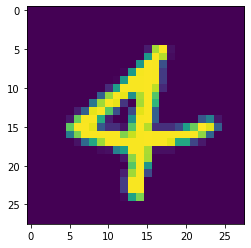

In [ ]:
plt.imshow(train_input[150]);

In [ ]:
train_input[0].shape

(28, 28)

In [ ]:
np.unique(test_output)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
dnn3 = Sequential()
dnn3.add(Flatten(input_shape=(28, 28)))
dnn3.add(Dense(100, activation='relu'))
dnn3.add(Dense(10, activation='softmax'))
dnn3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
dnn3.fit(train_input, train_output, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.8160 - accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4066 - accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2912 - accuracy: 0.9275
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2552 - accuracy: 0.9347
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2288 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2200 - accuracy: 0.9432
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2084 - accuracy: 0.9455
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2033 - accuracy: 0.9474
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1944 - accuracy: 0.9505
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.181

In [ ]:
dnn3.evaluate(test_input, test_output)

313/313 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.9451


[0.25962698459625244, 0.9451000094413757]

In [ ]:
import cv2
test_1 =  cv2.imread("/content/number.jpg", cv2.IMREAD_GRAYSCALE)

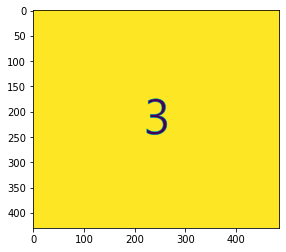

In [ ]:
plt.imshow(test_1);

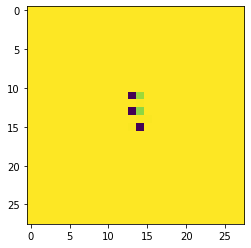

In [ ]:
test_1_re = cv2.resize(test_1, (28,28))
plt.imshow(test_1_re)

In [ ]:
test_1_re_res = test_1_re.reshape(-1, 28, 28)

In [ ]:
dnn3.predict(test_1_re_res)

array([[1.3993939e-11, 3.4851157e-03, 9.7108412e-01, 3.8078681e-03,
        5.3950789e-13, 2.4003270e-06, 1.0631023e-09, 2.1392295e-02,
        2.2813263e-04, 3.7408664e-15]], dtype=float32)

In [ ]:
np.argmax(dnn3.predict(test_1_re_res))

2

In [ ]:
test_1_re_res_r = 255-test_1_re_res
test_1_re_res_r[test_1_re_res_r<99]=0
test_1_re_res_r

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [ ]:
dnn3.predict(test_1_re_res_r)

array([[9.7759594e-06, 1.2319297e-08, 4.6342143e-07, 4.4311173e-03,
        3.7607725e-07, 9.5427775e-01, 3.9206107e-11, 4.1280128e-02,
        5.4637672e-09, 4.0312969e-07]], dtype=float32)

In [ ]:
np.argmax(dnn3.predict(test_1_re_res_r))

5

**2022 - 3 - 10**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
# sklearn -> 숫자 데이터 , mnist -> 이미지 데이터

In [ ]:
# 기본으로 6:1로 섞인다, 나눠주고 섞어준다
(train_input, train_output), (test_input, test_output) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


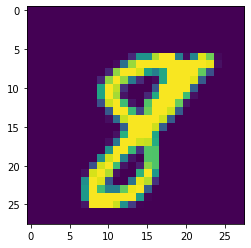

In [ ]:
plt.imshow(train_input[55]);

In [ ]:
train_output[55]

8

In [ ]:
len(train_input)

60000

In [ ]:
len(test_input)

10000

In [ ]:
np.unique(test_output)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_input[55].shape

(28, 28)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
dnn = Sequential()
dnn.add(Flatten(input_shape=(28, 28)))
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(10, activation='softmax')) # 10 대신 len(np.unique(test_input)) 을 넣으면 실수를 줄일 수 있다.
dnn.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 95,160
Trainable params: 95,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.fit(train_input, train_output, epochs=5, batch_size=600)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 0.1106 - accuracy: 0.9694
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 0.0866 - accuracy: 0.9748
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 0.0782 - accuracy: 0.9773
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 0.0726 - accuracy: 0.9788
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 0.0682 - accuracy: 0.9796


In [ ]:
dnn.evaluate(test_input, test_output)

313/313 [==============================] - 1s 3ms/step - loss: 0.1379 - accuracy: 0.9655


[0.1379288136959076, 0.965499997138977]

In [ ]:
import cv2 
test_1 = cv2.imread('/content/three.png', cv2.IMREAD_GRAYSCALE)

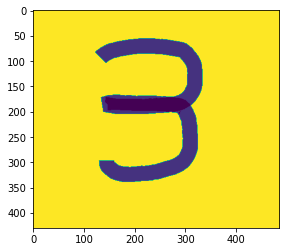

In [ ]:
plt.imshow(test_1);

In [ ]:
test_1.shape

(430, 487)

In [ ]:
# 1. size
# 2. to gray-scale
# 3. scale
test_1_resize = cv2.resize(test_1, (28, 28))
test_1_resize_reshape = test_1_resize.reshape(-1, 28, 28) # 3 차원으로

In [ ]:
dnn.predict(test_1_resize_reshape)

array([[1.7288703e-05, 1.9724264e-06, 1.7110831e-05, 1.1918071e-06,
        6.2869887e-10, 3.4542518e-07, 6.3392903e-08, 3.6977795e-07,
        9.9996150e-01, 9.0088143e-08]], dtype=float32)

In [ ]:
np.argmax(dnn.predict(test_1_resize_reshape)) # 높은 것의 인덱스를 구한다

8

In [ ]:
test_1_resize_r = 255-test_1_resize # 흑백반전
test_1_resize_r[test_1_resize_r<100]=0 # 배경 없애기
test_1_resize_r

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 146, 146, 146, 146,
        146, 146, 146, 146, 146,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 146, 146, 146, 146, 146, 146,
        146, 146, 146, 146, 146,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

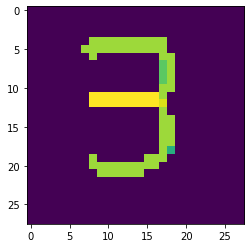

In [ ]:
plt.imshow(test_1_resize_r);

In [ ]:
test_1_resize_r_reshape = test_1_resize_r.reshape(-1, 28, 28)

In [ ]:
dnn.predict(test_1_resize_r_reshape)

array([[3.96291222e-10, 1.46707215e-08, 3.92002461e-04, 9.95281518e-01,
        9.38720675e-08, 5.49949647e-04, 1.88157281e-10, 4.15037675e-06,
        5.55089755e-05, 3.71674960e-03]], dtype=float32)

In [ ]:
np.argmax(dnn.predict(test_1_resize_r_reshape))

3

In [ ]:
# 스케일링 문제 때문에 (이미지를 보고 흑백으로 형태를 구분하는 것이면 이렇게), 음영이나 진하기가 중요할땐 이렇게 x
# - 상황에 따른 표준화가 중요
train_input = train_input/255
test_input = test_input/255

# 1.빅데이터란?
* 4만개 이상의 데이터, 인터넷의 발달, 과학 기술의 발달, 데이터의 누적, 데이터 자체가 하나의 분석/예측 시스템. 딥러닝의 성능 향상과 데이터수가 많아서 요새 뜨고 있다.
* The definition of big data is data that contains greater variety, arriving in increasing volumes and with more velocity. This is also known as the three Vs.

# 2.Machine Learning?
* 자체적으로 데이터를 분류, 회귀하는 기법. 인공지능의 하부 카테고리로 크게 지도 학습과 비지도 학습으로 나뉜다.

# 3.Deep Learning?
* 머신러닝의 한 종류, 심층신경망을 사용한 기법입니다. 초창기 딥러닝 기법은 정확도가 낮아 사장되었으나, 빅데이터의 등장으로 높은 정확도를 가지며 현재 가장 주목받는 기법입니다.

# 4.머신러닝의 종류?
* 지도학습: 분류, 회귀, 라벨링 0, 1을 지정해줘야 한다(사전 지식이 필요).
 * 유방암 데이터 - 양성/악성, 0/1
* 비지도 학습: 클러스터링, 알아서 나눠준다(사전 지식 불필요).
 * 

# 5.어떤 데이터 분석 고나련 프로젝트를 진행해보았나?
* 목표, 노하우, CNN, 이미지 DNN등 설명?

# 7.train, test, validation datasets?
* train - 학습시킬 때 쓰에는 데이터, 전체의 70~80%
* test - 학습시킬 때 쓰이는 데이터, 전체의 20~30%
* train_test_split - 75:25가 기본값
* validation - 지나치게 test에 과적합되는 것을 막기위한, 검증을 한 번 더 하는 것

# 8.sklearn?
* 머신러닝 라이브러리
* A free software machine learning library for the Python programming language.

# 9.tensorflow? (keras가 tf의 패키지 중 하나)
* 딥러닝 라이브러리

# 10.Hyperparamter?
* 머신러닝 모델에 사용되는 파라미터 중, 인간이 결정해야 하는 파라미터들
 * Alpha, k, node, epochs, drop out, batch_size 등

# 11. 사용해본 머신러닝 기법?
* SVM? - 각 데이터와 그 직선 간의 거리가 최대가 되는 데이터를 구분하는 선, 서포트 벡터(직선)을 구하여 나누는 머신러닝 기법. 직선간의 거리를 마진이라 한다.
 * 변수에 linear, rbf... 연구할 때 linear할 때, 사실 rbf가 제일 좋은듯?
* DecisionTree? - 지니계수와 정보 이득을 이용한 머신러닝 기법, 스무고개 게임과 비슷하다. 다른 머신러닝 분석과 다르게 나뉘는 이유를 알 수 있어 좋다.
* RandomForest? - 결정트리의 과적합을 막기 위해, 결정트리를 평균 한 것. 이렇게 머신러닝 기법을 2개 이상 섞은 것을 앙상블 기법이라고 한다.
* KNN? - 간단하게 민주주의, 
* DNN? - Deep Neuron Network 심층신경망 - 인공지능
* K-means? - 클러스터링 기법으로, 중심점을 잡고 근접한 것끼리 모으는 것. inertia가 최소가 되는 지점으로 결정.

# 12. 사용해 본 회귀기법?
* 선형 - 두 데이터의 y = ax + b 를 구한다
* 다항 - 두 데이터의 곡선형 함수를 구한다. Ex) y = ax^2 + bx + c
* Lasso - 다중 회귀, y = wa + wb + wc + wd ... 계수 (가중치)의 절댓값의 합을 구함
* Ridge - 다중 회구, y = wa + wb + wc + wd ... 계수 (가중치)의 제곱의 합을 구함.
 * 선형 회귀를 개선한 선형 모델
 * 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
 * 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
 * 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

# 13. Numpy?
* 배열을 다루는 라이브러리

# 14. Pandas?
* 데이터 프레임을 다루는 라이브러리

# 15. Loss Function?
* 손실함수, 딥러닝에 쓰일 때는 실제 정답과 예측값을 수치로 나타낸 함수
 * mean_squared_error
 * crossentropy를 쓴다
 * 0과 1로 나누는 2진 분류 - binary_crossentropy 사용
 * 0, 1, 2... 등 다준 분류때는 - sparse_categorical_crossentropy 사용. categorical_crossentropy는? - 다른 것들과 확실히 구분 되는 것, 0 이냐 아니냐

# 16. 최적화기법?
* Optimizer - 손실함수에서 최적값 속도를 빠르게, saddling point를 막아주는 알고리즘
 * momentum - 속도를 빠르게
 * adaptive gd - 기울기가 클 때는 느리게, 기울기가 작을 때는 빠르게
 * RMSprop - 현재 값과 경사 하강 사이에 가중치, 현재 데이터를 살릴지, 과거 데이터를 더 부각할지 결정
 * adam - momentum + RMSprop 을 합친것
* RMSprop이나 adam을 주로 씀.

# 17. Activation Function?
* 딥러닝에서 쓰일 때, 값들을 이진, 다중 라벨로 분류하기 위한 함수
 * 이진 - (출력층) sigmoid
 * 다중 - (출력층) softmax
 * 어떤 것이든 - (은닉층)

# 18. 과적합을 막기 위해 할 수 있는 조치?
* 딥러닝 - mini-batch, drop-out, 노트 개수, 층수를 줄 일 수 있고 변수를 바꿔 볼 수 있다. PCA 전처리(차원축소)
* 하이퍼파라미터 - 값을 조정, 변수 자체, PCA 전처리(차원축소)

# 19. Confusion matrix?
* 단순 score로 나타내기엔 의료/법의 위험이 많다. 특히 2종 오류. 민감도, 특이도, 정확도, 정밀도를 도출할 수 있는 행렬, 이것을 기반으로 AUC-ROC 커브.

# 20. 경사하강법?
- 손실함수 최솟값을 구할 때, 기울기으 ㅣ반대방향으로 학습률만큼 이동하는 알고리즘으로 손실함수의 최솟값을 찾을 때 사용.

# 21. 상관계수의 의미
* 두 데이터 사이의 관계를 -1 ~ 1 사이로 나타낸 것. -1에 가까울수록, 음의 상관관계, 1에 가까울수록 양의 상관관계, 0에 가까울수록 두 데이터는 독립.

**2022 - 3 - 11**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Sex_re'] = df['Sex'].apply(lambda x:1 if x=='female' else 0)
df['Embarked_re'] = df['Embarked'].apply(lambda x:0 if x=='S' else (1 if x=='C' else -1))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
df2 = df.dropna(subset=['Age'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


(1). 2
(2). 4
(3). 4?

In [ ]:
# iris 정확도 (딥러닝 ㄴㄴ)
# 1) 어떤기법?
# 2) test 정확도
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn.svm import SVC, SVR
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear', C=0.12)
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9714285714285714
평가 데이터 점수 : 0.9777777777777777


In [ ]:
# diabetes
# 1) 어떤 기법?
# 2) 구현

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR(kernel='linear', epsilon=1.0)
model.fit(X_train, y_train)

SVR(epsilon=1.0, kernel='linear')

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.5162107037669883
평가 데이터 점수 : 0.44954718800160287


In [ ]:
# 딥러닝 구현
# epochs = 2, 그 외 모든 테크닉 가능
# loss function, activation 자율
# train, test

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Sex_re'] = df['Sex'].apply(lambda x:1 if x=='female' else 0)
df['Embarked_re'] = df['Embarked'].apply(lambda x:0 if x=='S' else (1 if x=='C' else -1))

In [ ]:
len(df['Survived']), len(df['PassengerId'])

(891, 891)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
df2 = df.dropna(subset=['Age'])
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
del df2["PassengerId"]
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
del df2['Name']
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
del df2['Sex']

In [ ]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_re,Embarked_re
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
del df2['Embarked']
del df2['Ticket']
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_re,Embarked_re
0,0,3,22.0,1,0,7.2500,NaN,0,0
1,1,1,38.0,1,0,71.2833,C85,1,1
2,1,3,26.0,0,0,7.9250,NaN,1,0
3,1,1,35.0,1,0,53.1000,C123,1,0
4,0,3,35.0,0,0,8.0500,NaN,0,0


In [ ]:
del df2['Cabin']
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_re,Embarked_re
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0


In [ ]:
y = df2['Survived']

In [ ]:
del df2['Survived']
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_re,Embarked_re
0,3,22.0,1,0,7.2500,0,0
1,1,38.0,1,0,71.2833,1,1
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,0


In [ ]:
X = np.array(df2)

In [ ]:
len(X), len(y)

(714, 714)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ss = StandardScaler()
X_s = ss.fit_transform(X)
X_s

array([[ 0.91123237, -0.53037664,  0.52457013, ..., -0.51897787,
        -0.75905134, -0.30972966],
       [-1.47636364,  0.57183099,  0.52457013, ...,  0.69189675,
         1.31743394,  1.90174012],
       [ 0.91123237, -0.25482473, -0.55170307, ..., -0.50621356,
         1.31743394, -0.30972966],
       ...,
       [-1.47636364, -0.73704057, -0.55170307, ..., -0.08877362,
         1.31743394, -0.30972966],
       [-1.47636364, -0.25482473, -0.55170307, ..., -0.08877362,
        -0.75905134,  1.90174012],
       [ 0.91123237,  0.15850313, -0.55170307, ..., -0.50952283,
        -0.75905134, -2.52119945]])

In [ ]:
len(X_s), len(y)

(714, 714)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dnn = Sequential()
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(loss='mean_squared_error', metrics='accuracy', optimizer='adam')

In [ ]:
dnn.fit(X_train, y_train, epochs=2, batch_size=50)

Epoch 1/2
12/12 [==============================] - 1s 3ms/step - loss: 0.2100 - accuracy: 0.7356
Epoch 2/2
12/12 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.8021


In [ ]:
dnn.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1466 - accuracy: 0.8182


[0.14658260345458984, 0.8181818127632141]